In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd

# Load the CSV file from correct path
df = pd.read_csv('/kaggle/input/earthquake/earthquake_alert_balanced_dataset.csv')

# Preview first few rows
df.head()


,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


 Hive Queries with Pandas


In [8]:

# Q1. Total number of earthquakes
len(df)


1300

In [9]:
# Q2. Average magnitude
df['magnitude'].mean()



7.061007692307692

In [10]:

# Q3. Earthquakes with alert = 'red'
df[df['alert'] == 'red']

,magnitude,depth,cdi,mmi,sig,alert
25,7.30,41.0,9.0,8.0,93.0,red
44,7.00,20.0,8.0,8.0,-56.0,red
49,7.20,10.0,9.0,8.0,27.0,red
154,7.50,20.0,8.0,8.0,-22.0,red
185,7.30,19.0,8.0,9.0,-26.0,red
...,...,...,...,...,...,...
1026,7.35,18.0,8.0,8.0,-14.0,red
1027,7.16,9.0,9.0,9.0,79.0,red
1028,7.20,9.0,9.0,8.0,74.0,red
1029,7.20,10.0,9.0,8.0,26.0,red


In [11]:
# Q4. Count of earthquakes by alert level
df['alert'].value_counts()

alert
green     325
yellow    325
orange    325
red       325
Name: count, dtype: int64

In [12]:
# Q5. Maximum and minimum depth
df['depth'].max(), df['depth'].min()



(670.0, 2.0)

In [13]:
# Q6. Earthquakes with magnitude > 7.0
df[df['magnitude'] > 7.0]


,magnitude,depth,cdi,mmi,sig,alert
3,7.30,37.0,5.0,5.0,65.0,green
9,7.60,26.0,9.0,8.0,7.0,yellow
13,7.60,116.0,8.0,8.0,-59.0,yellow
18,7.20,236.0,7.0,5.0,108.0,green
25,7.30,41.0,9.0,8.0,93.0,red
...,...,...,...,...,...,...
1293,7.91,23.0,8.0,8.0,40.0,yellow
1294,7.65,23.0,7.0,8.0,32.0,yellow
1296,7.85,93.0,8.0,6.0,-51.0,yellow
1297,7.48,142.0,7.0,6.0,120.0,yellow


In [14]:
# Q7. Group by alert and average magnitude
df.groupby('alert')['magnitude'].mean()


alert
green     6.856000
orange    7.058000
red       7.248185
yellow    7.081846
Name: magnitude, dtype: float64

In [15]:
# Q8. Earthquakes sorted by significance
df.sort_values(by='sig', ascending=False).head(10)

,magnitude,depth,cdi,mmi,sig,alert
289,7.80,664.0,6.0,3.0,127.0,green
343,7.60,22.0,0.0,7.0,121.0,green
130,7.50,145.0,7.0,7.0,121.0,yellow
1297,7.48,142.0,7.0,6.0,120.0,yellow
225,6.90,9.0,9.0,6.0,120.0,green
10,6.90,10.0,9.0,9.0,119.0,yellow
1072,7.49,145.0,7.0,6.0,119.0,yellow
1134,6.70,40.0,7.0,7.0,118.0,yellow
123,6.60,57.0,7.0,6.0,118.0,yellow
1102,6.74,35.0,7.0,7.0,118.0,yellow


In [17]:
# Q9. Count of earthquakes with depth > 500
df[df['depth'] > 500].shape[0]



36

SQL Queries with SQLite

In [18]:
import sqlite3

In [20]:
conn = sqlite3.connect(':memory:')



In [21]:
df.to_sql('earthquake', conn, index=False, if_exists='replace')


1300

In [23]:
import pandas as pd

# Preview first 5 rows using SQL
pd.read_sql_query("SELECT * FROM earthquake LIMIT 5", conn)

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [24]:
# Q1. Select all records
pd.read_sql_query("SELECT * FROM earthquake LIMIT 5", conn)


,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [25]:
# Q2. Count by alert
pd.read_sql_query("SELECT alert, COUNT(*) FROM earthquake GROUP BY alert", conn)


,alert,COUNT(*)
0,green,325
1,orange,325
2,red,325
3,yellow,325


In [26]:
# Q3. Average magnitude
pd.read_sql_query("SELECT AVG(magnitude) FROM earthquake", conn)


,AVG(magnitude)
0,7.061008


In [27]:

# Q4. Filter depth > 500
pd.read_sql_query("SELECT * FROM earthquake WHERE depth > 500", conn)


,magnitude,depth,cdi,mmi,sig,alert
0,7.0,579.0,3.0,3.0,-13.0,green
1,6.6,624.0,0.0,2.0,-98.0,green
2,7.0,660.0,4.0,3.0,-13.0,green
3,6.8,630.0,1.0,3.0,-57.0,green
4,6.5,622.0,3.0,2.0,-115.0,green
5,6.8,535.0,2.0,3.0,-56.0,green
6,6.9,535.0,4.0,3.0,-28.0,green
7,7.3,527.0,4.0,4.0,58.0,green
8,6.9,624.0,4.0,3.0,-19.0,green
9,6.6,533.0,4.0,2.0,-84.0,green


In [28]:
# Q5. Max significance
pd.read_sql_query("SELECT * FROM earthquake ORDER BY sig DESC LIMIT 1", conn)


,magnitude,depth,cdi,mmi,sig,alert
0,7.8,664.0,6.0,3.0,127.0,green


In [29]:
# Q6. Group by alert and avg magnitude
pd.read_sql_query("SELECT alert, AVG(magnitude) FROM earthquake GROUP BY alert", conn)

,alert,AVG(magnitude)
0,green,6.856000
1,orange,7.058000
2,red,7.248185
3,yellow,7.081846


In [30]:
# Q7. Order by magnitude
pd.read_sql_query("SELECT * FROM earthquake ORDER BY magnitude DESC LIMIT 10", conn)

,magnitude,depth,cdi,mmi,sig,alert
0,8.60,20.0,9.0,7.0,0.0,yellow
1,8.45,20.0,8.0,7.0,0.0,yellow
2,8.33,21.0,9.0,7.0,1.0,yellow
3,8.30,22.0,9.0,8.0,-88.0,orange
4,8.30,598.0,5.0,5.0,91.0,green
5,8.28,22.0,9.0,8.0,-88.0,orange
6,8.28,21.0,8.0,7.0,-87.0,orange
7,8.26,21.0,8.0,8.0,-86.0,orange
8,8.25,21.0,8.0,8.0,-85.0,orange
9,8.25,21.0,9.0,8.0,-90.0,orange


In [31]:
# Q8. Earthquakes with alert = 'red'
pd.read_sql_query("SELECT * FROM earthquake WHERE alert = 'red'", conn)


,magnitude,depth,cdi,mmi,sig,alert
0,7.30,41.0,9.0,8.0,93.0,red
1,7.00,20.0,8.0,8.0,-56.0,red
2,7.20,10.0,9.0,8.0,27.0,red
3,7.50,20.0,8.0,8.0,-22.0,red
4,7.30,19.0,8.0,9.0,-26.0,red
...,...,...,...,...,...,...
320,7.35,18.0,8.0,8.0,-14.0,red
321,7.16,9.0,9.0,9.0,79.0,red
322,7.20,9.0,9.0,8.0,74.0,red
323,7.20,10.0,9.0,8.0,26.0,red


In [32]:

# Q9. Earthquakes with magnitude > 7
pd.read_sql_query("SELECT * FROM earthquake WHERE magnitude > 7", conn)

,magnitude,depth,cdi,mmi,sig,alert
0,7.30,37.0,5.0,5.0,65.0,green
1,7.60,26.0,9.0,8.0,7.0,yellow
2,7.60,116.0,8.0,8.0,-59.0,yellow
3,7.20,236.0,7.0,5.0,108.0,green
4,7.30,41.0,9.0,8.0,93.0,red
...,...,...,...,...,...,...
615,7.91,23.0,8.0,8.0,40.0,yellow
616,7.65,23.0,7.0,8.0,32.0,yellow
617,7.85,93.0,8.0,6.0,-51.0,yellow
618,7.48,142.0,7.0,6.0,120.0,yellow


In [33]:
# Q10. Delete green alerts (simulation)
conn.execute("DELETE FROM earthquake WHERE alert = 'green'")
conn.commit()


# Visualization

Q: Earthquake magnitudes ka distribution kaisa hai?


In [35]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

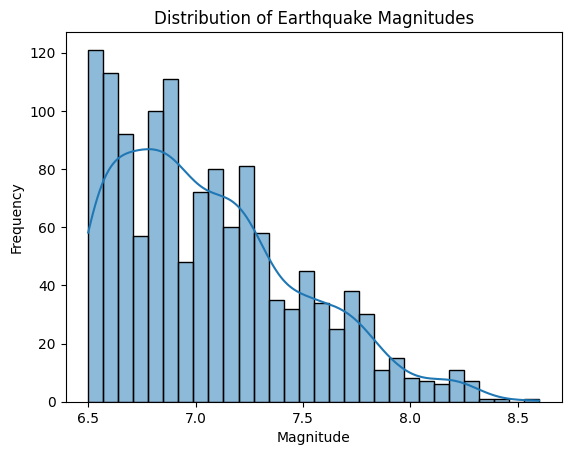

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['magnitude'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

Q: Depth aur magnitude ke beech kya relation hai?


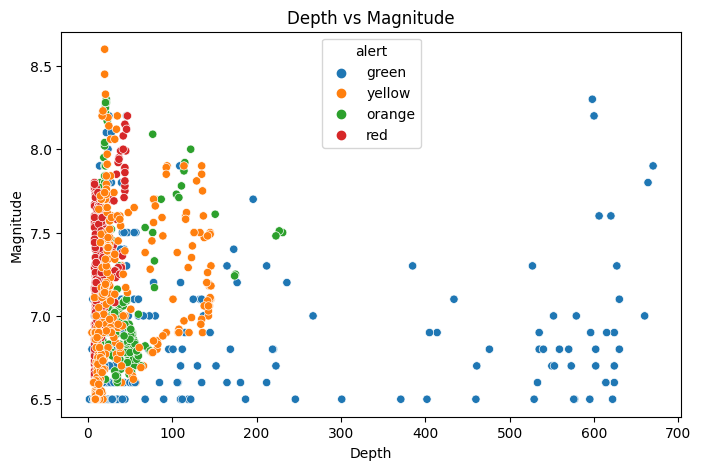

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='depth', y='magnitude', data=df, hue='alert')
plt.title('Depth vs Magnitude')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.show()

Q: Har alert level ke kitne earthquakes hue?


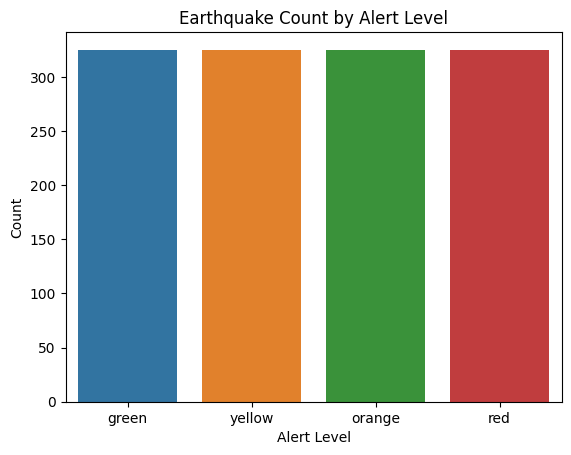

In [38]:
sns.countplot(x='alert', data=df, order=df['alert'].value_counts().index)
plt.title('Earthquake Count by Alert Level')
plt.xlabel('Alert Level')
plt.ylabel('Count')
plt.show()

Q: Har alert level ke liye magnitude ka range kya hai?


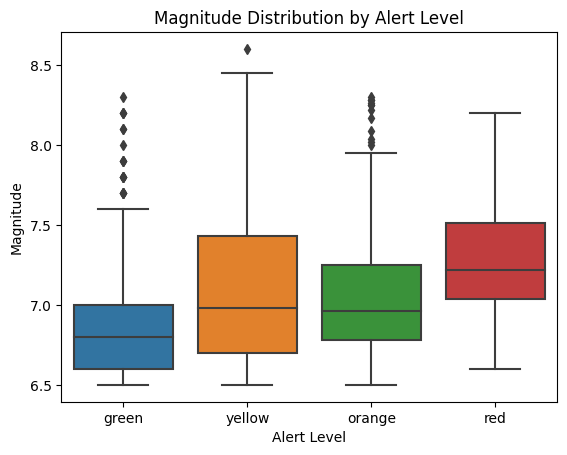

In [39]:
sns.boxplot(x='alert', y='magnitude', data=df)
plt.title('Magnitude Distribution by Alert Level')
plt.xlabel('Alert Level')
plt.ylabel('Magnitude')
plt.show()

Q: Numerical features ke beech correlation kya hai?


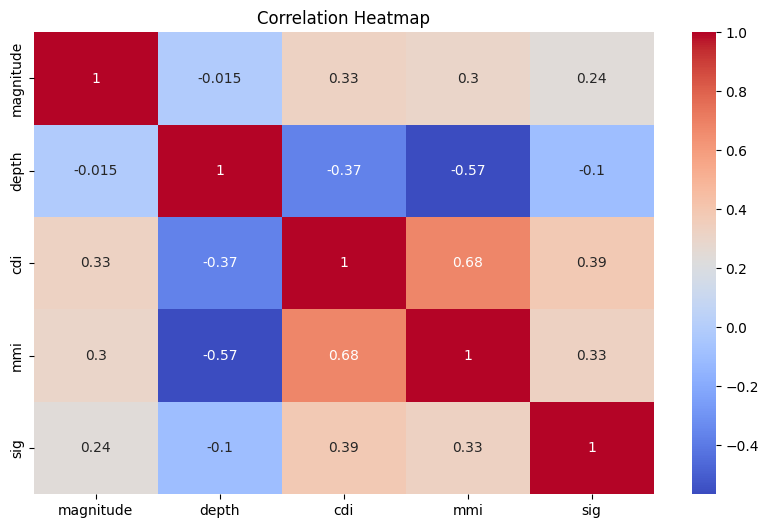

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['magnitude','depth','cdi','mmi','sig']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Q: Alert levels ka percentage distribution kya hai?


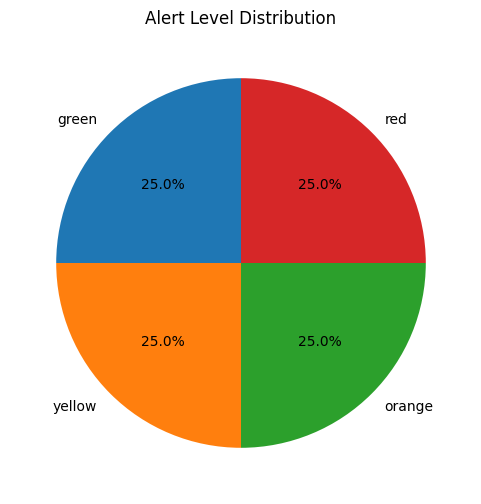

In [41]:
df['alert'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title('Alert Level Distribution')
plt.ylabel('')
plt.show()

Q: Magnitude aur significance ke beech trend kya hai


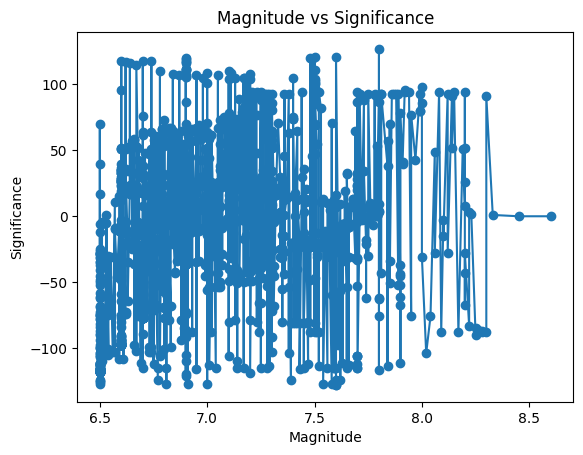

In [42]:
df_sorted = df.sort_values(by='magnitude')
plt.plot(df_sorted['magnitude'], df_sorted['sig'], marker='o')
plt.title('Magnitude vs Significance')
plt.xlabel('Magnitude')
plt.ylabel('Significance')
plt.show()

Q: Depth ka distribution har alert level ke liye kaisa hai?


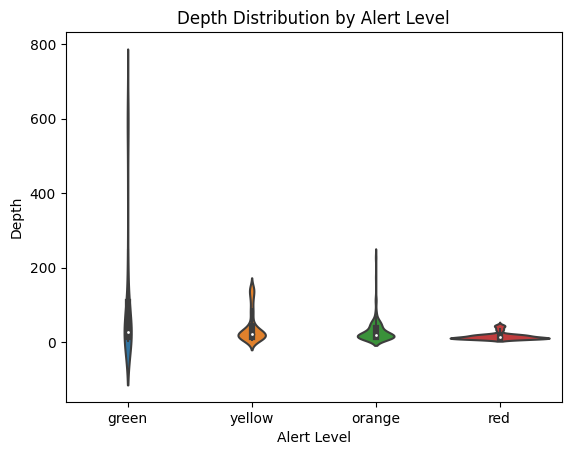

In [43]:
sns.violinplot(x='alert', y='depth', data=df)
plt.title('Depth Distribution by Alert Level')
plt.xlabel('Alert Level')
plt.ylabel('Depth')
plt.show()

Q: CDI aur MMI ka density distribution kya hai?


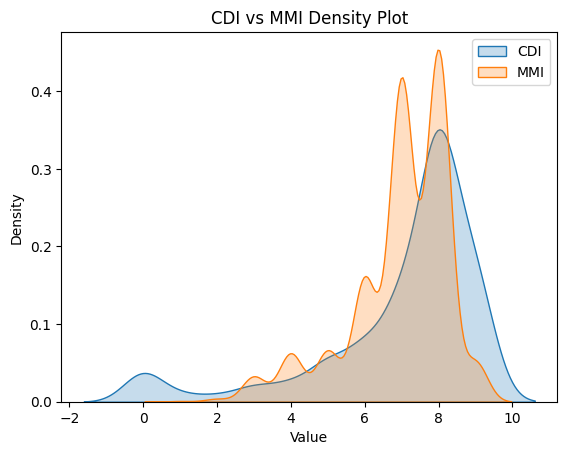

In [44]:
sns.kdeplot(df['cdi'], label='CDI', shade=True)
sns.kdeplot(df['mmi'], label='MMI', shade=True)
plt.title('CDI vs MMI Density Plot')
plt.xlabel('Value')
plt.legend()
plt.show()

Q: Key numerical features ke beech pairwise relation kya hai?


In [46]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

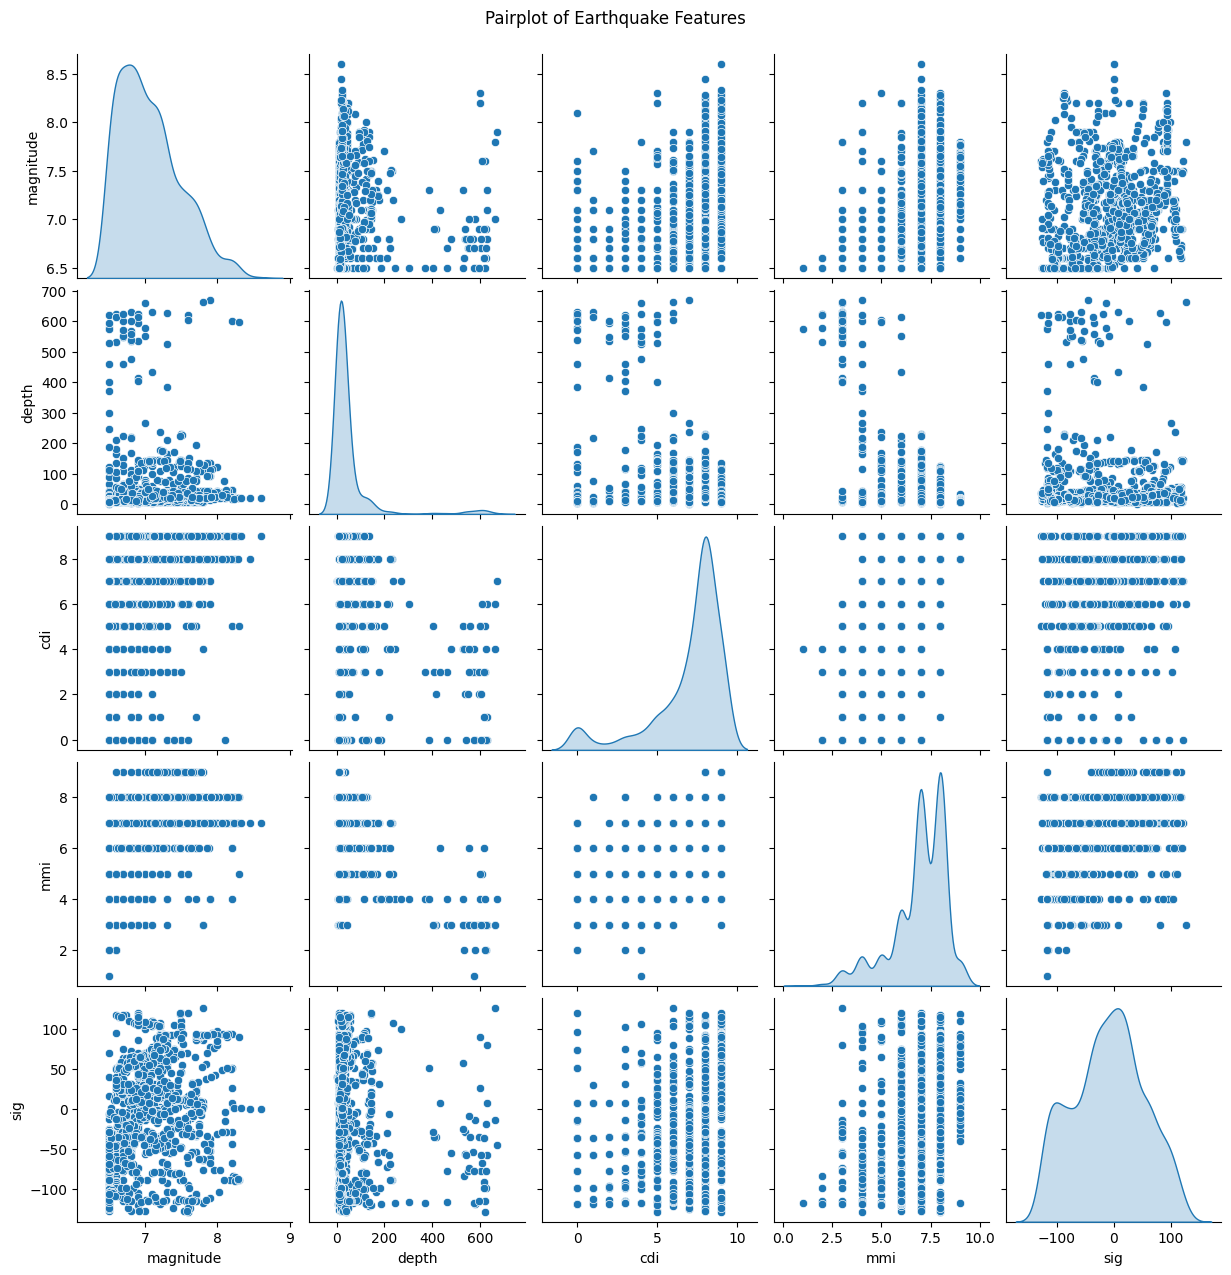

In [47]:
sns.pairplot(df[['magnitude','depth','cdi','mmi','sig']], diag_kind='kde')
plt.suptitle('Pairplot of Earthquake Features', y=1.02)
plt.show()